In [1]:
import numpy
import plotly.figure_factory as ff
import plotly.graph_objects as go

import sys
import sys
import pathlib
sys.path.append(str(pathlib.Path("").resolve().parent / "build" / "release" / "python"))  # noqa

from ipctk import *

In [2]:
ea0, ea1, eb0, eb1 = (numpy.random.random(3) for i in range(4))
edge_edge_distance(ea0, ea1, eb0, eb1)

0.07057729716403718

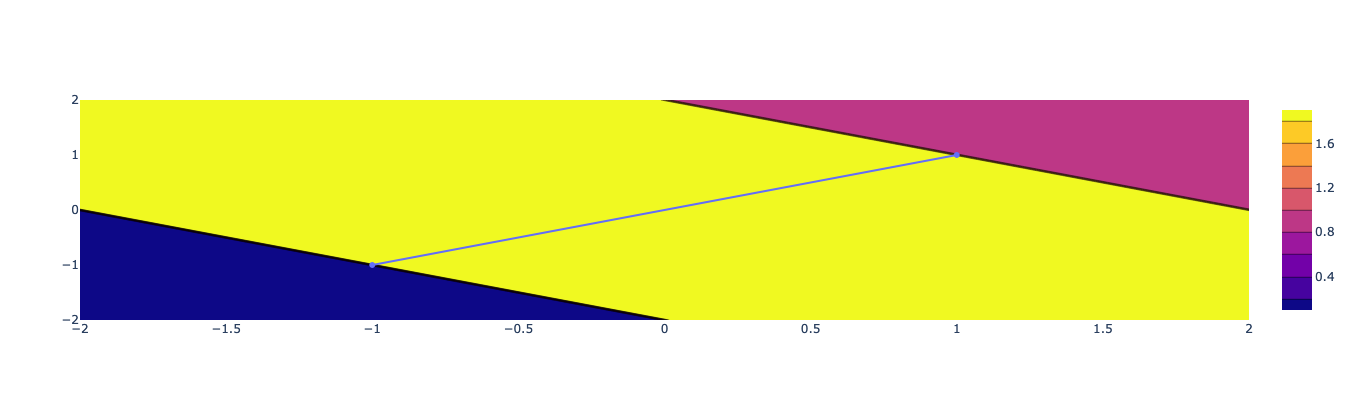

In [3]:
e0 = numpy.array([-1.0, -1.0])
e1 = numpy.array([1.0, 1.0])
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
dtypes = numpy.empty((xs.size, ys.size), dtype=int)
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        dtypes[j, i] = point_edge_distance_type(
            numpy.array([x, y]), e0, e1)
fig = go.Figure(data=[
    go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]]),
    go.Contour(z=dtypes, x=xs, y=ys)
], layout=go.Layout(width=400, height=400))
fig.show()

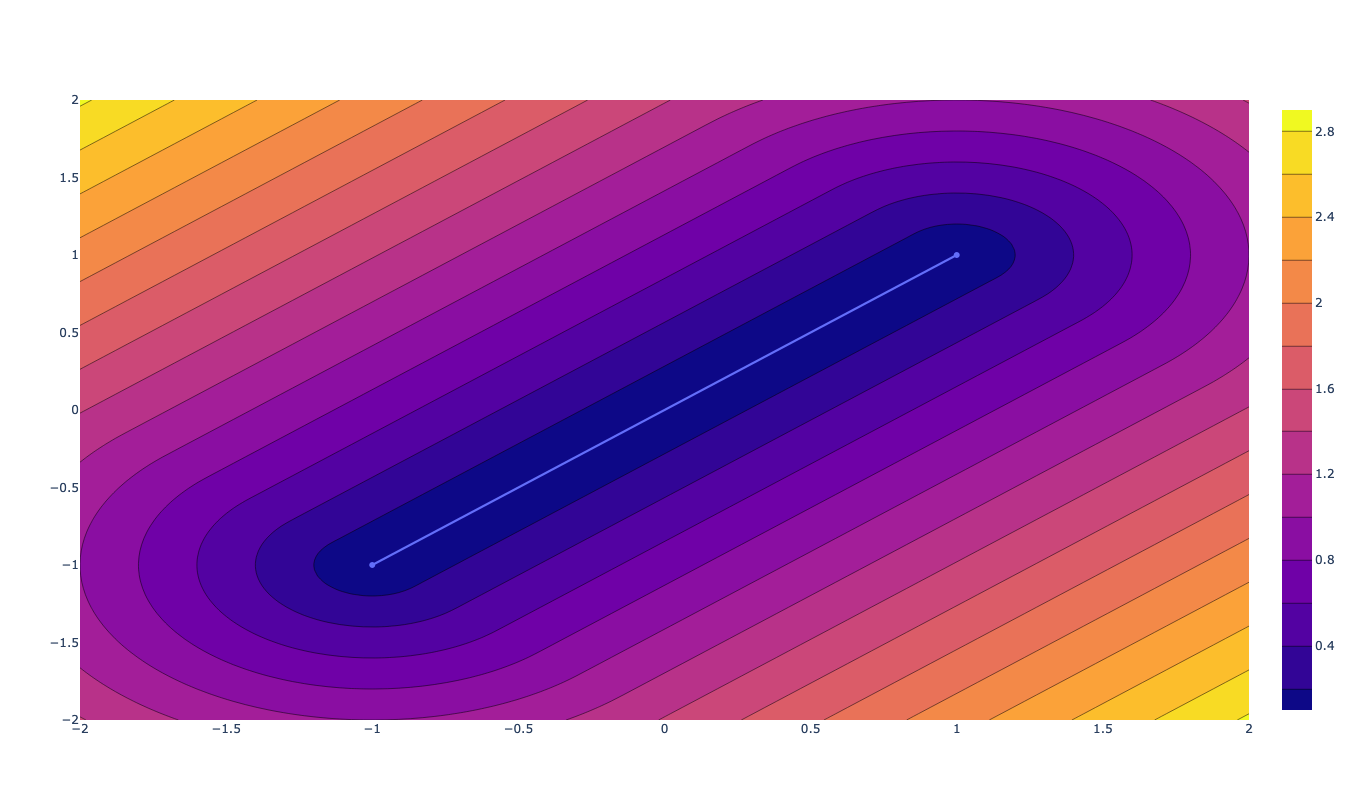

In [4]:
e0 = numpy.array([-1, -1], dtype=float)
e1 = numpy.array([1, 1], dtype=float)
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
distances = numpy.empty((xs.size, ys.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        distances[j, i] = point_edge_distance(numpy.array([x, y]), e0, e1)
fig = go.Figure(data=[
    go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]]),
    go.Contour(z=numpy.sqrt(distances), x=xs, y=ys)
], layout=go.Layout(width=800, height=800))
fig.show()

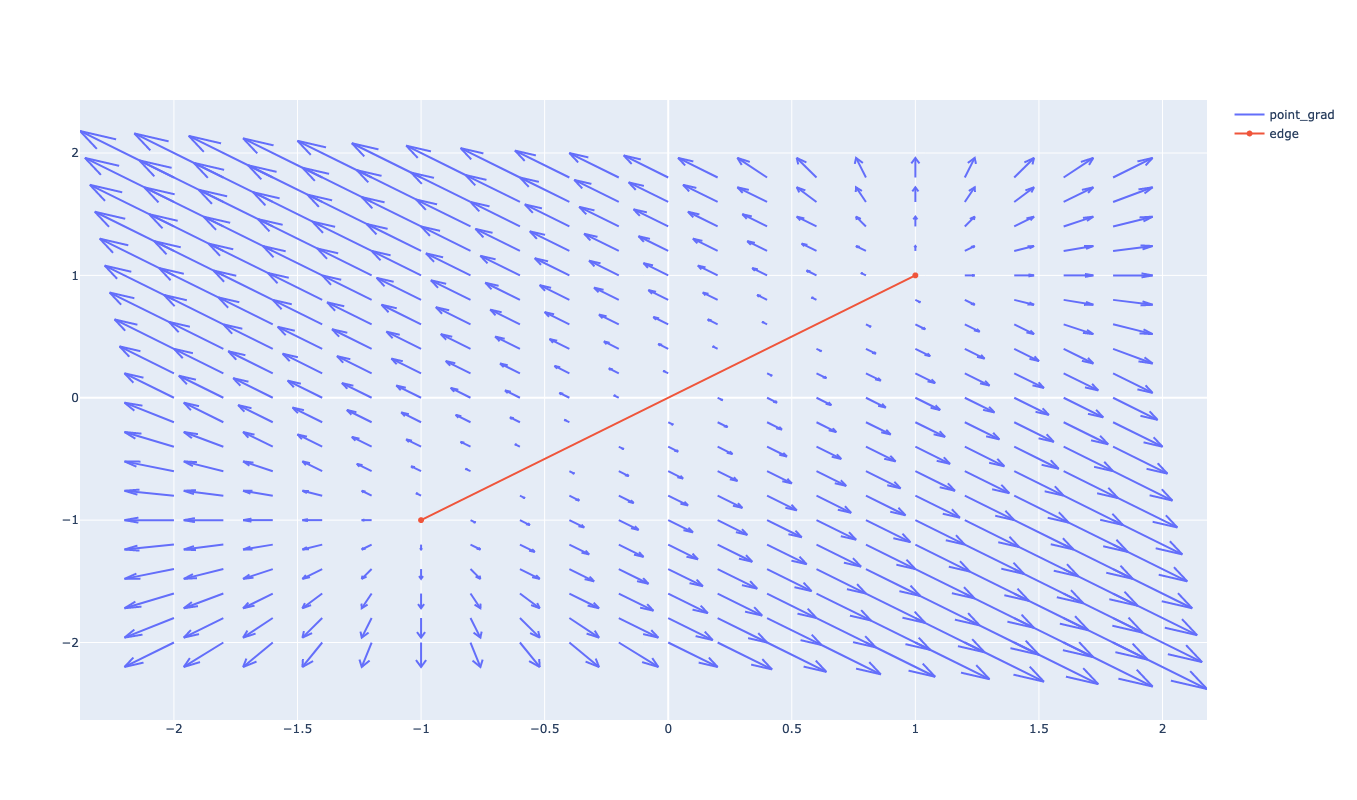

<ipython-input-5-6e9810e5f2d5>:19: RuntimeWarning:

invalid value encountered in true_divide



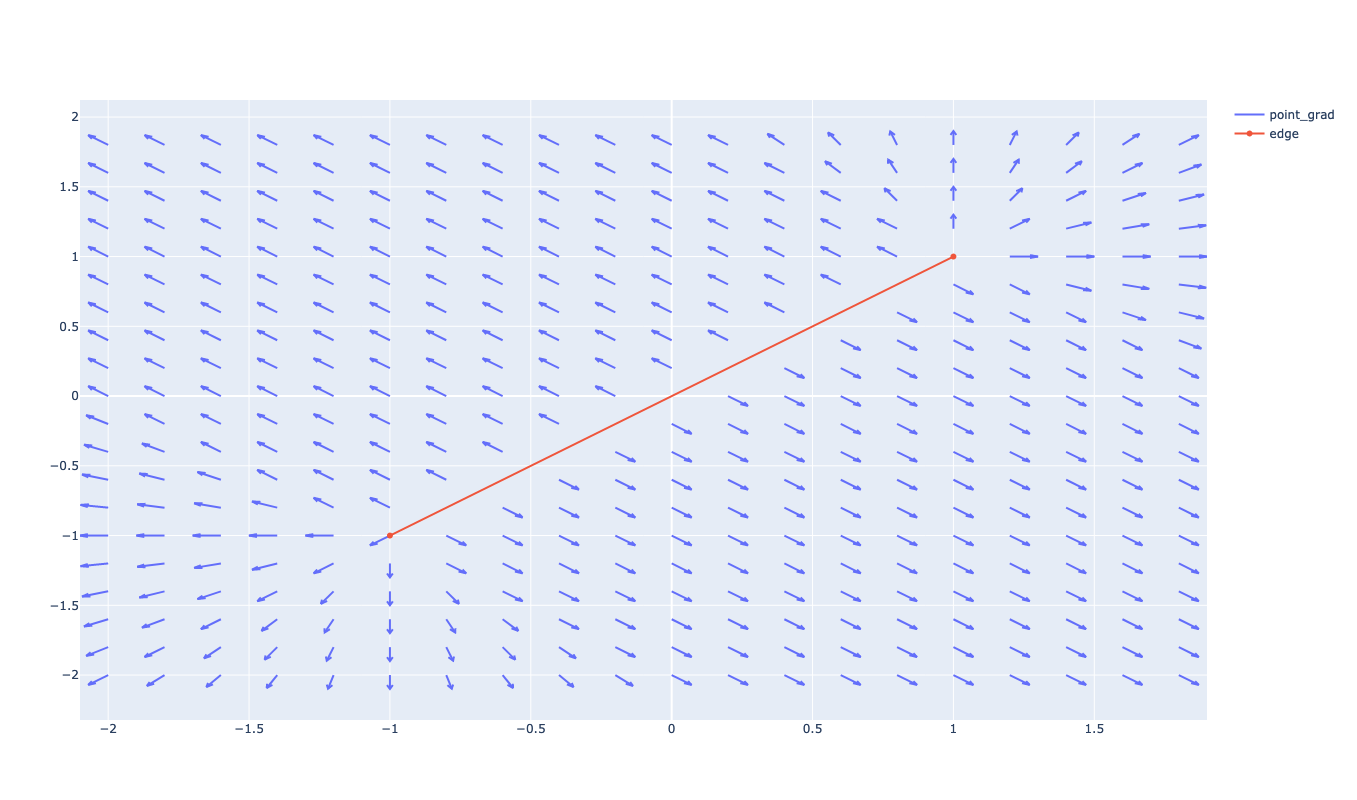

In [5]:
e0 = numpy.array([-1, -1], dtype=float)
e1 = numpy.array([1, 1], dtype=float)
x, y = numpy.meshgrid(numpy.arange(-2, 2, .2), numpy.arange(-2, 2, .2))
u, v = numpy.empty(x.shape), numpy.empty(x.shape)
d = numpy.empty(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        grad = point_edge_distance_gradient(
            numpy.array([x[i, j], y[i, j]]), e0, e1)
        u[i, j] = grad[0]
        v[i, j] = grad[1]
        d[i, j] = numpy.sqrt(point_edge_distance(
            numpy.array([x[i, j], y[i, j]]), e0, e1))

fig = ff.create_quiver(x, y, u, v, name="point_grad")
fig.add_trace(go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()
fig = ff.create_quiver(x, y, u/(2 * d), v / (2 * d), name="point_grad")
fig.add_trace(go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()

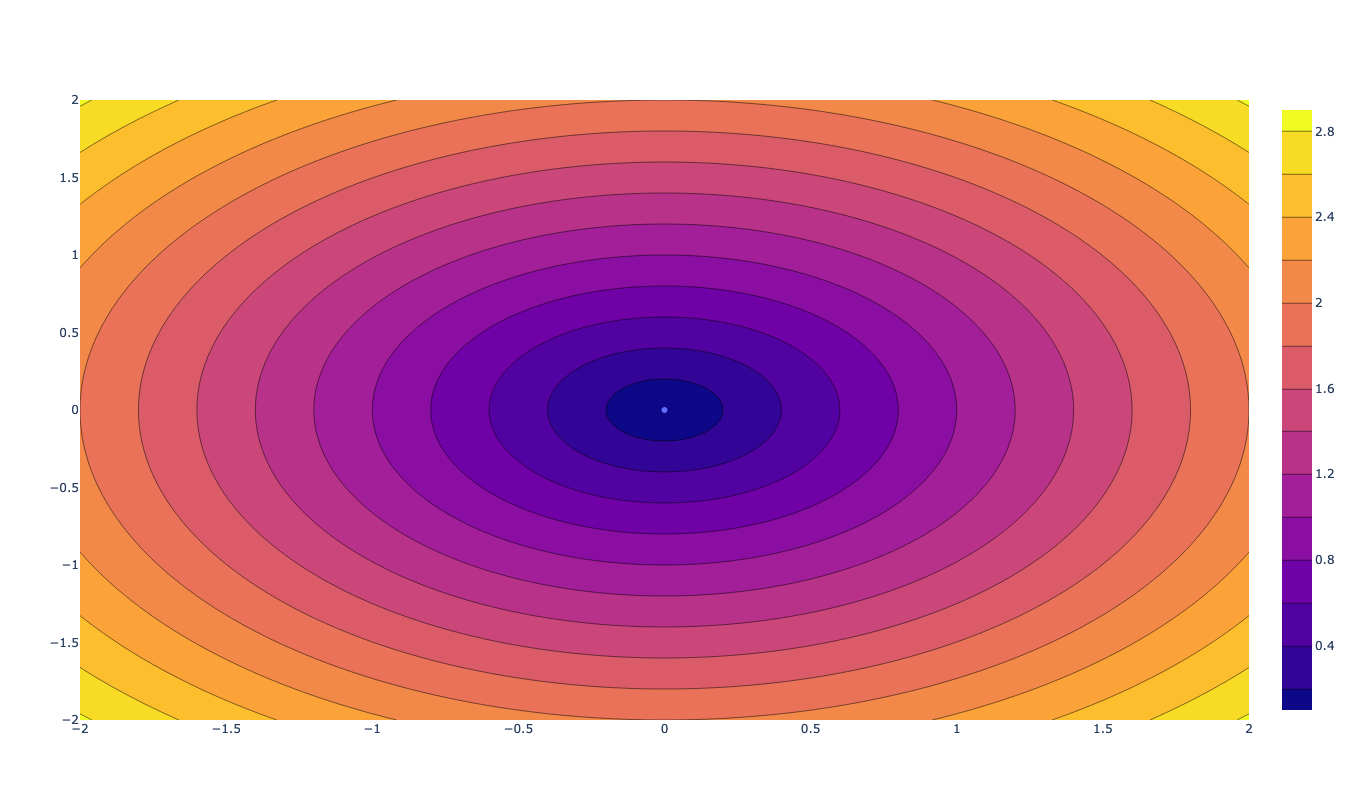

In [6]:
p = numpy.array([0, 0], dtype=float)
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
distances = numpy.empty((xs.size, ys.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        distances[j, i] = point_point_distance(numpy.array([x, y]), p)
fig = go.Figure(data=[
    go.Scatter(x=[p[0]], y=[p[1]]),
    go.Contour(z=numpy.sqrt(distances), x=xs, y=ys)
], layout=go.Layout(width=800, height=800))
fig.show()

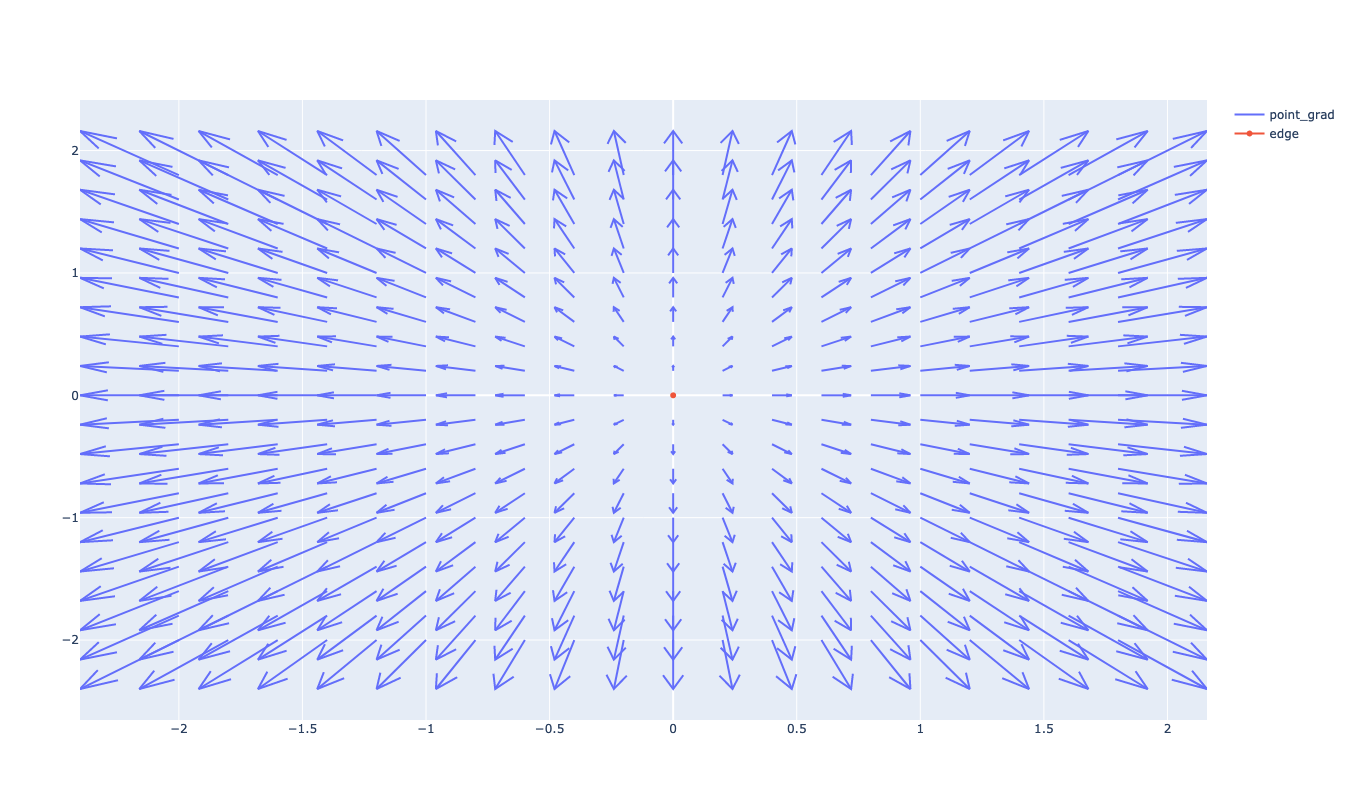

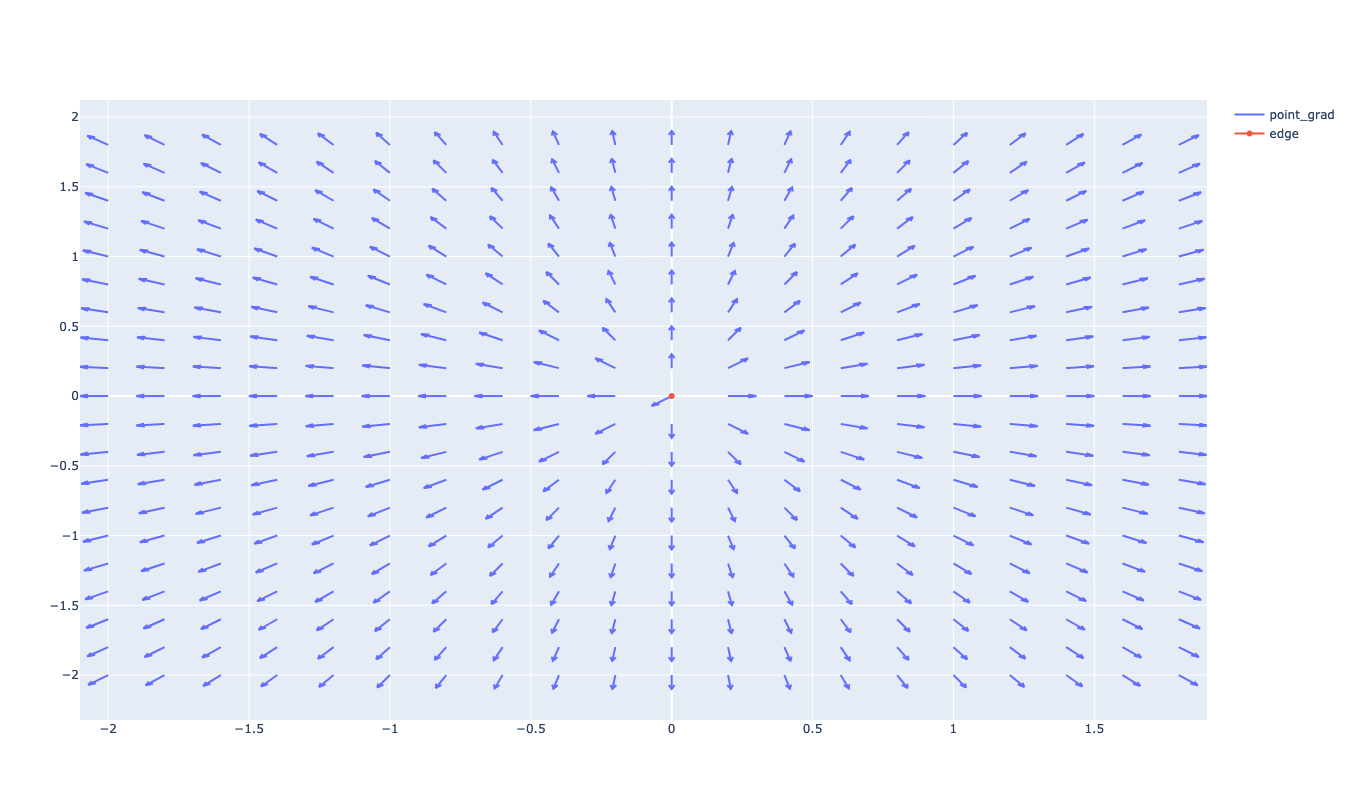

In [7]:
p = numpy.array([0, 0], dtype=float)
x, y = numpy.meshgrid(numpy.arange(-2, 2, .2), numpy.arange(-2, 2, .2))
u, v = numpy.empty(x.shape), numpy.empty(x.shape)
d = numpy.empty(x.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        grad = point_point_distance_gradient(
            numpy.array([x[i, j], y[i, j]]), p)
        u[i, j] = grad[0]
        v[i, j] = grad[1]
        d[j, i] = numpy.sqrt(point_point_distance(
            numpy.array([x[i, j], y[i, j]]), p))

fig = ff.create_quiver(x, y, u, v, name="point_grad")
fig.add_trace(go.Scatter(x=[p[0]], y=[p[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()
fig = ff.create_quiver(x, y, u/(2 * d), v / (2 * d), name="point_grad")
fig.add_trace(go.Scatter(x=[p[0]], y=[p[1]], name="edge"))
fig.update_layout(width=800, height=800)
fig.show()

In [8]:
ea0 = numpy.random.random(3)
ea1 = numpy.random.random(3)
eb0 = numpy.random.random(3)
eb1 = numpy.random.random(3)

print(edge_edge_distance(ea0, ea1, eb0, eb1))
print(edge_edge_distance_gradient(ea0, ea1, eb0, eb1))
print(edge_edge_distance_hessian(ea0, ea1, eb0, eb1))

0.0022147852561451337
[ 0.0034443  -0.00117358  0.00066588  0.08419363 -0.02868728  0.01627709
 -0.08763793  0.02986085 -0.01694297  0.          0.          0.        ]
[[-3.25351363e-03 -2.42842078e-03 -9.21797386e-05  4.25243441e-02
  -1.00948668e-01  2.13433913e-02 -3.92708305e-02  1.03377089e-01
  -2.12512116e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.42842078e-03  2.15945070e-03 -3.52925814e-05 -1.26305555e-02
   3.68638353e-02  8.17168053e-03  1.50589763e-02 -3.90232860e-02
  -8.13638795e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.21797386e-05 -3.52925814e-05  3.08787326e-03 -4.79439690e-04
  -1.46710121e-03  7.58239369e-02  5.71619428e-04  1.50239379e-03
  -7.89118101e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.25243441e-02 -1.26305555e-02 -4.79439690e-04  1.67430078e+00
  -5.25048114e-01  1.11009958e-01 -1.71682512e+00  5.37678670e-01
  -1.10530518e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00948668e-01  3.68638353e-02 -

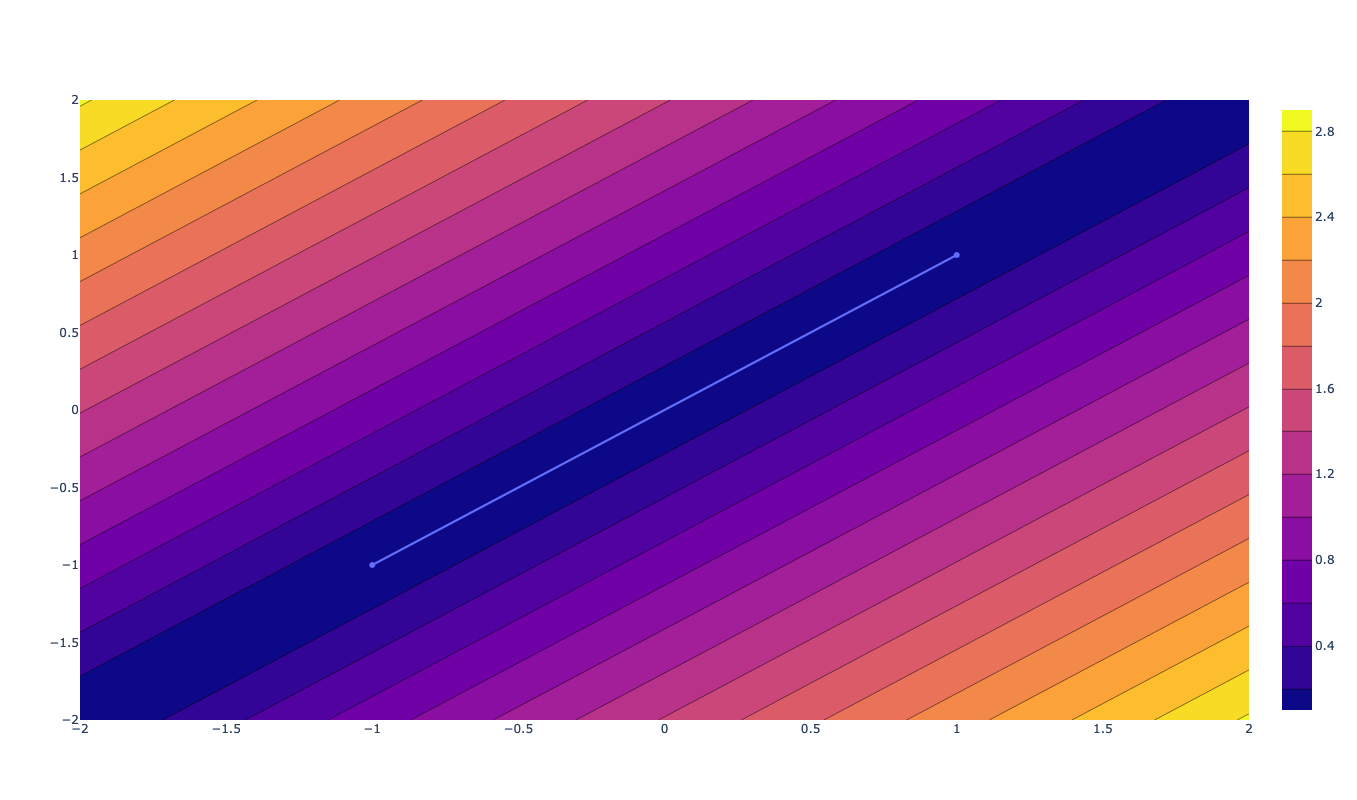

In [9]:
e0 = numpy.array([-1, -1], dtype=float)
e1 = numpy.array([1, 1], dtype=float)
xs = numpy.linspace(-2, 2, 100)
ys = numpy.linspace(-2, 2, 100)
distances = numpy.empty((xs.size, ys.size))
for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        distances[j, i] = point_line_distance(numpy.array([x, y]), e0, e1)
fig = go.Figure(data=[
    go.Scatter(x=[e0[0], e1[0]], y=[e0[1], e1[1]]),
    go.Contour(z=numpy.sqrt(distances), x=xs, y=ys)
], layout=go.Layout(width=800, height=800))
fig.show()

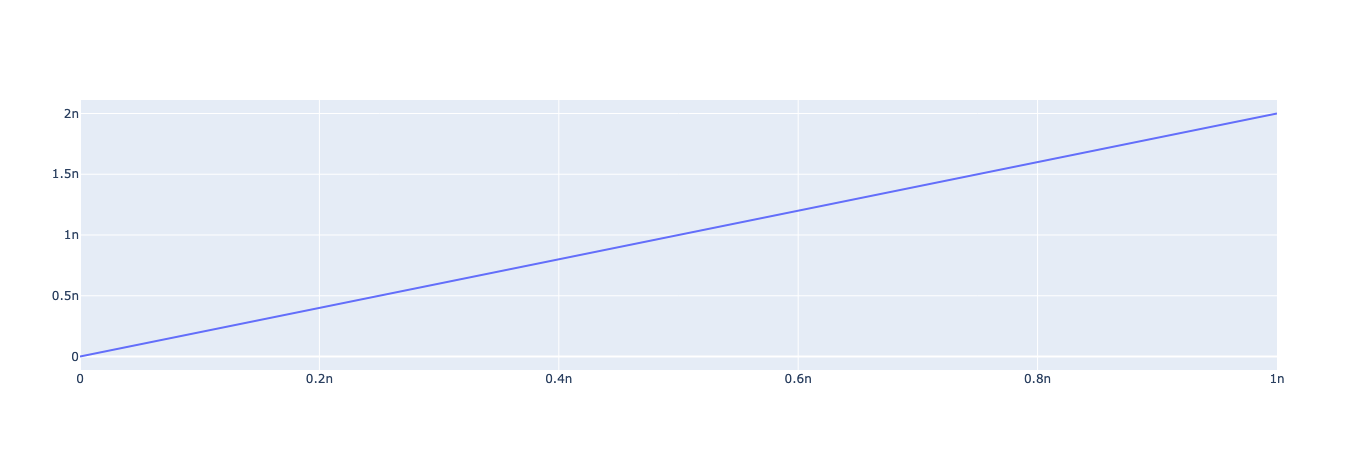

In [10]:
x = numpy.linspace(0, 1e-9)
y = numpy.asarray(list(map(lambda x: edge_edge_mollifier(x, eps_x=1), x)))
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

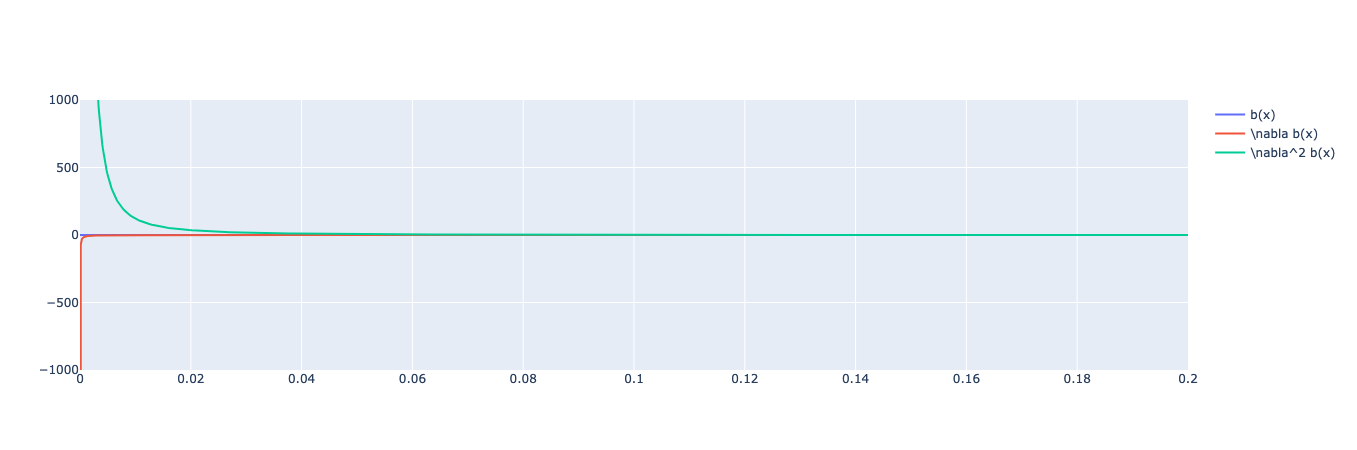

In [11]:
d = numpy.geomspace(1e-12, 0.2, 1000)
dhat = 0.1
b = numpy.vectorize(lambda x: barrier(x, dhat))(d)
b_grad = numpy.vectorize(lambda x: barrier_gradient(x, dhat))(d)
b_hess = numpy.vectorize(lambda x: barrier_hessian(x, dhat))(d)
fig = go.Figure(data=[go.Scatter(x=d, y=b, name="b(x)"), go.Scatter(x=d, y=b_grad, name=r"\nabla b(x)"), go.Scatter(x=d, y=b_hess, name=r"\nabla^2 b(x)")])
fig.update_layout(yaxis_range=[-1000, 1000])
fig.show()

In [17]:
V = numpy.random.random((4, 3))
E = numpy.arange(10).reshape(-1, 2)
F = numpy.arange(9).reshape(-1, 3)
dhat = 1
vvc = VertexVertexConstraint(0, 1)
vvc.multiplicity = 10
print(vvc.compute_potential(V, E, F, dhat))
print(vvc.compute_potential_gradient(V, E, F, dhat))
print(vvc.compute_potential_hessian(V, E, F, dhat, False))
print(vvc.multiplicity)

cs = Candidates()
cs.ev_candidates = [EdgeVertexCandidate(i, i+1) for i in range(20)]
print(cs.ev_candidates)
cs.size()

1.97607348075272
[ -1.34936642  17.89170288  -3.76170169   1.34936642 -17.89170288
   3.76170169]
[[ -25.71857573   -9.6052785     2.01949432   25.71857573    9.6052785
    -2.01949432]
 [  -9.6052785   100.91662419  -26.77715401    9.6052785  -100.91662419
    26.77715401]
 [   2.01949432  -26.77715401  -20.81313851   -2.01949432   26.77715401
    20.81313851]
 [  25.71857573    9.6052785    -2.01949432  -25.71857573   -9.6052785
     2.01949432]
 [   9.6052785  -100.91662419   26.77715401   -9.6052785   100.91662419
   -26.77715401]
 [  -2.01949432   26.77715401   20.81313851    2.01949432  -26.77715401
   -20.81313851]]
10
[EdgeVertexCandidate(0, 1), EdgeVertexCandidate(1, 2), EdgeVertexCandidate(2, 3), EdgeVertexCandidate(3, 4), EdgeVertexCandidate(4, 5), EdgeVertexCandidate(5, 6), EdgeVertexCandidate(6, 7), EdgeVertexCandidate(7, 8), EdgeVertexCandidate(8, 9), EdgeVertexCandidate(9, 10), EdgeVertexCandidate(10, 11), EdgeVertexCandidate(11, 12), EdgeVertexCandidate(12, 13), EdgeVer

20